### André Callil
### PriceHubble Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import os
import shutil
import matplotlib.pyplot as plt


### Data Cleaning & Exploration

In [2]:
df = pd.read_csv('/Users/acallil/Desktop/Andre/Studies/Propulsion/Project/Data/imgs_kitchen_bathroom.csv')


In [3]:
df.head()


,offer_id,image_uri,is_bathroom,is_kitchen
0,b83f41472477768f787fcdaba791bf0aa6d58e88afb5f2...,b6bfdb5a67ebc75b3fe8610f3e28e8e5d9644d6f.jpg,False,True
1,b83f41472477768f787fcdaba791bf0aa6d58e88afb5f2...,17933fb4be872590c54b2a41024bbae3e4adc858.jpg,True,False
2,77514404db0d645f607c928b59188d2ad6a615ba2118dd...,homegateOnline_5e26b6d96b1f231d69cdbd8ce2d401b...,True,False
3,77514404db0d645f607c928b59188d2ad6a615ba2118dd...,homegateOnline_5e26b6d96b1f231d69cdbd8ce2d401b...,True,False
4,bacdfaea1480adbed3a54505e3eefdd87f91300565852a...,fe973a0b2612a55a331558d3f8d1ffa676becb9e.jpg,True,False


In [4]:
df.isnull().sum()


offer_id       0
image_uri      0
is_bathroom    0
is_kitchen     0
dtype: int64

In [5]:
len(df)


15560

In [6]:
# Images labeled as both bathroom and kitchen
true_df = df[((df['is_bathroom'] == True) & (df['is_kitchen'] == True))]
len(true_df)


21

In [7]:
# Images labeled as none bathroom nor kitchen
false_df = df[((df['is_bathroom'] == False) & (df['is_kitchen'] == False))]
len(false_df)


0

In [8]:
# Drop image label duplicates
df = df.drop_duplicates(subset=['image_uri'])
len(df)


15493

In [9]:
# Drop images labeled as both bathroom and kitchen
df = df.drop(true_df.index.tolist())
len(df)


15472

In [10]:
df.describe()


,offer_id,image_uri,is_bathroom,is_kitchen
count,15472,15472,15472,15472
unique,7500,15472,2,2
top,b262fc9e3ce8182199ba40eeb3c96502fb653d52c20d1d...,fed8243b3f8e96b09b8ae6821eefd2d15d1ba0bb.jpg,True,False
freq,6,1,9033,9033


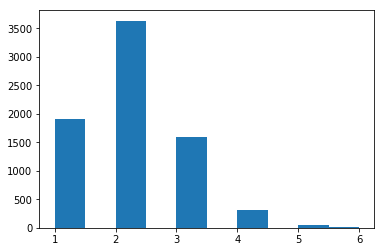

In [11]:
# Amount of pictures per apartment ranges from 1 to 6
plt.hist(df['offer_id'].value_counts())
None


In [12]:
# Creating a df with only bathroom pictures
df_baths = df.loc[df['is_bathroom'] == True]
df_baths.describe()


,offer_id,image_uri,is_bathroom,is_kitchen
count,9033,9033,9033,9033
unique,6628,9033,1,1
top,2374ad24e384f22ce772b43d91daa90fbeffe04e87bf2d...,ba619b78794ec24145dcc35a58b3739513b54e12.jpg,True,False
freq,5,1,9033,9033


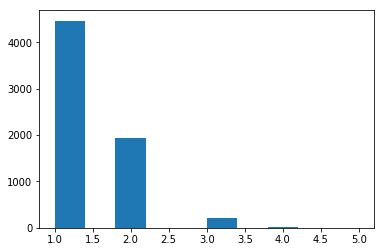

In [13]:
# Amount of bathroom pictures per apartments
baths_hist = df_baths['offer_id'].value_counts()
plt.hist(baths_hist)
None


In [14]:
# Creating a df with only kitchen pictures
df_kits = df.loc[df['is_kitchen'] == True]
df_kits.describe()


,offer_id,image_uri,is_bathroom,is_kitchen
count,6439,6439,6439,6439
unique,5708,6439,1,1
top,bbc263062d0ed755d0ead8a5844a5cc7250a72cc069cea...,8382ffe4a4deb847569d2c620c1eda4d086c7059.jpg,False,True
freq,3,1,6439,6439


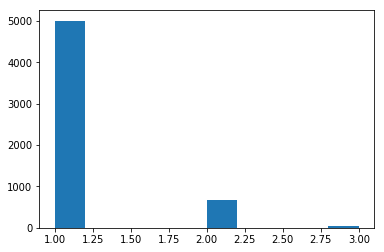

In [15]:
# Amount of kitchen pictures per apartments
kits_hist = df_kits['offer_id'].value_counts()
plt.hist(kits_hist)
None


In [16]:
df = df.reset_index()


### Separating pictures into baths and kits folders

In [17]:
base = './Data/data/annotations_dated/20190706'

for i in range(df.shape[0]):
    if os.path.isfile(os.path.join(base, 'imgs_kitchen_bathroom', df['image_uri'][i])): 
        if df['is_bathroom'][i]:
            shutil.move(os.path.join(base, 'imgs_kitchen_bathroom', df['image_uri'][i]),
                       os.path.join(base, 'room-type', 'bath', df['image_uri'][i]))
        if df['is_kitchen'][i]:
            shutil.move(os.path.join(base, 'imgs_kitchen_bathroom', df['image_uri'][i]),
                       os.path.join(base, 'room-type', 'kit', df['image_uri'][i]))


In [18]:
df.head()

,index,offer_id,image_uri,is_bathroom,is_kitchen
0,0,b83f41472477768f787fcdaba791bf0aa6d58e88afb5f2...,b6bfdb5a67ebc75b3fe8610f3e28e8e5d9644d6f.jpg,False,True
1,1,b83f41472477768f787fcdaba791bf0aa6d58e88afb5f2...,17933fb4be872590c54b2a41024bbae3e4adc858.jpg,True,False
2,2,77514404db0d645f607c928b59188d2ad6a615ba2118dd...,homegateOnline_5e26b6d96b1f231d69cdbd8ce2d401b...,True,False
3,3,77514404db0d645f607c928b59188d2ad6a615ba2118dd...,homegateOnline_5e26b6d96b1f231d69cdbd8ce2d401b...,True,False
4,4,bacdfaea1480adbed3a54505e3eefdd87f91300565852a...,fe973a0b2612a55a331558d3f8d1ffa676becb9e.jpg,True,False


### Adding classification to dataframe

In [19]:
df["class"] = ""


In [20]:
df.head()


,index,offer_id,image_uri,is_bathroom,is_kitchen,class
0,0,b83f41472477768f787fcdaba791bf0aa6d58e88afb5f2...,b6bfdb5a67ebc75b3fe8610f3e28e8e5d9644d6f.jpg,False,True,
1,1,b83f41472477768f787fcdaba791bf0aa6d58e88afb5f2...,17933fb4be872590c54b2a41024bbae3e4adc858.jpg,True,False,
2,2,77514404db0d645f607c928b59188d2ad6a615ba2118dd...,homegateOnline_5e26b6d96b1f231d69cdbd8ce2d401b...,True,False,
3,3,77514404db0d645f607c928b59188d2ad6a615ba2118dd...,homegateOnline_5e26b6d96b1f231d69cdbd8ce2d401b...,True,False,
4,4,bacdfaea1480adbed3a54505e3eefdd87f91300565852a...,fe973a0b2612a55a331558d3f8d1ffa676becb9e.jpg,True,False,


In [21]:
top_bath = os.listdir('/Users/acallil/Desktop/Andre/Studies/Propulsion/Project/Data/data/annotations_dated/20190706/room-type/classification/bath/top-bath')

for file in top_bath:
    df['class'].loc[df['image_uri'] == file] = 1


/Users/acallil/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [22]:
normal_bath = os.listdir('/Users/acallil/Desktop/Andre/Studies/Propulsion/Project/Data/data/annotations_dated/20190706/room-type/classification/bath/normal-bath')

for file in normal_bath:
    df['class'].loc[df['image_uri'] == file] = 2
    

In [23]:
simple_bath = os.listdir('/Users/acallil/Desktop/Andre/Studies/Propulsion/Project/Data/data/annotations_dated/20190706/room-type/classification/bath/simple-bath')

for file in simple_bath:
    df['class'].loc[df['image_uri'] == file] = 3


In [24]:
top_kit = os.listdir('/Users/acallil/Desktop/Andre/Studies/Propulsion/Project/Data/data/annotations_dated/20190706/room-type/classification/kit/top-kit')

for file in top_kit:
    df['class'].loc[df['image_uri'] == file] = 1
    

In [25]:
normal_kit = os.listdir('/Users/acallil/Desktop/Andre/Studies/Propulsion/Project/Data/data/annotations_dated/20190706/room-type/classification/kit/normal-kit')

for file in normal_kit:
    df['class'].loc[df['image_uri'] == file] = 2
    

In [26]:
simple_kit = os.listdir('/Users/acallil/Desktop/Andre/Studies/Propulsion/Project/Data/data/annotations_dated/20190706/room-type/classification/kit/simple-kit')

for file in simple_kit:
    df['class'].loc[df['image_uri'] == file] = 3
    

In [27]:
df_baths = df[df['is_bathroom']==True]
df_baths = df_baths.reset_index(drop=True)
df_baths.head()


,index,offer_id,image_uri,is_bathroom,is_kitchen,class
0,1,b83f41472477768f787fcdaba791bf0aa6d58e88afb5f2...,17933fb4be872590c54b2a41024bbae3e4adc858.jpg,True,False,3
1,2,77514404db0d645f607c928b59188d2ad6a615ba2118dd...,homegateOnline_5e26b6d96b1f231d69cdbd8ce2d401b...,True,False,
2,3,77514404db0d645f607c928b59188d2ad6a615ba2118dd...,homegateOnline_5e26b6d96b1f231d69cdbd8ce2d401b...,True,False,
3,4,bacdfaea1480adbed3a54505e3eefdd87f91300565852a...,fe973a0b2612a55a331558d3f8d1ffa676becb9e.jpg,True,False,
4,6,00bd7a80b42815726d208786050e4212303f2ec6c30717...,immoscout_8a33fd5323c6751be285d0b0aac72d248823...,True,False,3


In [28]:
df_baths['class'].value_counts()


     6663
2    1237
1     567
3     566
Name: class, dtype: int64

In [29]:
df_kits = df[df['is_kitchen']==True]
df_kits = df_kits.reset_index(drop=True)
df_kits.head()


,index,offer_id,image_uri,is_bathroom,is_kitchen,class
0,0,b83f41472477768f787fcdaba791bf0aa6d58e88afb5f2...,b6bfdb5a67ebc75b3fe8610f3e28e8e5d9644d6f.jpg,False,True,
1,5,0259302e5b357c9a5f07373f1e73963abffdafcfec14cb...,immoscout_d45a5162b26833a3431867fe3e3f337b10b7...,False,True,
2,7,00bd7a80b42815726d208786050e4212303f2ec6c30717...,immoscout_8a33fd5323c6751be285d0b0aac72d248823...,False,True,3
3,8,b9881b8c4b58a1c209c61d6dcc2b31fbf8dd8e24626344...,homegateOnline_47e2914389de3c080907b7aa4fea69a...,False,True,3
4,12,717e391296dce480affe430c064ed7ae8d66c527bc4d60...,newhome_a90ad72684e521293b391115f7643a158cc664...,False,True,3


In [30]:
df_kits['class'].value_counts()


     4442
2     865
1     569
3     563
Name: class, dtype: int64

## Code to easily label pictures and move to its respective folder

In [31]:
import os
import numpy as np
import pandas as pd

# to access folder, get random image
import random, os 
from os import listdir
from random import choice

from IPython.display import display, Image # display image inline

from IPython.display import clear_output # clear user input, refresh image

immoscout_e5e438ea1c3260b67726ee58b7f9dd0da400b389_img-4_04.06.2016-19.22.23.png


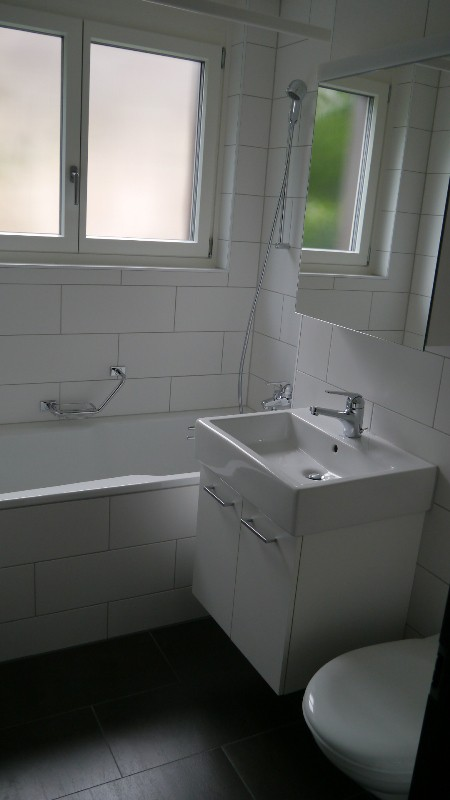

In [32]:
# this code displays a random image from the folder

ext2conttype = {"jpg": "image/jpeg",
                "jpeg": "image/jpeg",
                "png": "image/png"}

def content_type(filename):
    return ext2conttype[filename[filename.rfind(".")+1:].lower()]

def isimage(filename):
    """true if the filename's extension is in the content-type lookup"""
    filename = filename.lower()
    return filename[filename.rfind(".")+1:] in ext2conttype

def random_file(dir):
    """returns the filename of a randomly chosen image in dir"""
    images = [f for f in listdir(dir) if isimage(f)]
    return choice(images)

if __name__ == "__main__":
    dir = '/Users/acallil/Desktop/Andre/Studies/Propulsion/Project/Data/data/annotations_dated/20190706/room-type/bath/'
    r = random_file(dir)
    #print("Content-type: %s\n" % (content_type(r)))
    #Image(open(dir+r, "rb").read())
    print(r)
    display(Image(data=dir, filename=(dir+r)))
    

In [33]:
# load most recent table
df_kits.head()

,index,offer_id,image_uri,is_bathroom,is_kitchen,class
0,0,b83f41472477768f787fcdaba791bf0aa6d58e88afb5f2...,b6bfdb5a67ebc75b3fe8610f3e28e8e5d9644d6f.jpg,False,True,
1,5,0259302e5b357c9a5f07373f1e73963abffdafcfec14cb...,immoscout_d45a5162b26833a3431867fe3e3f337b10b7...,False,True,
2,7,00bd7a80b42815726d208786050e4212303f2ec6c30717...,immoscout_8a33fd5323c6751be285d0b0aac72d248823...,False,True,3
3,8,b9881b8c4b58a1c209c61d6dcc2b31fbf8dd8e24626344...,homegateOnline_47e2914389de3c080907b7aa4fea69a...,False,True,3
4,12,717e391296dce480affe430c064ed7ae8d66c527bc4d60...,newhome_a90ad72684e521293b391115f7643a158cc664...,False,True,3


In [43]:
df_kits['class'].value_counts()

     4442
2     865
1     569
3     563
Name: class, dtype: int64

In [54]:
imag = []
bath = []

In [55]:
class_baths_df = pd.DataFrame(list(zip(imag, bath)), 
               columns =['image_uri', 'class']) 
class_baths_df['class'].astype(float)
class_baths_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 2 columns):
image_uri    0 non-null object
class        0 non-null object
dtypes: object(2)
memory usage: 0.0+ bytes


homegateOnline_7315d854a78119407519d4c093241cf62c040b6c_img-6_19.04.2017-15.56.42.png


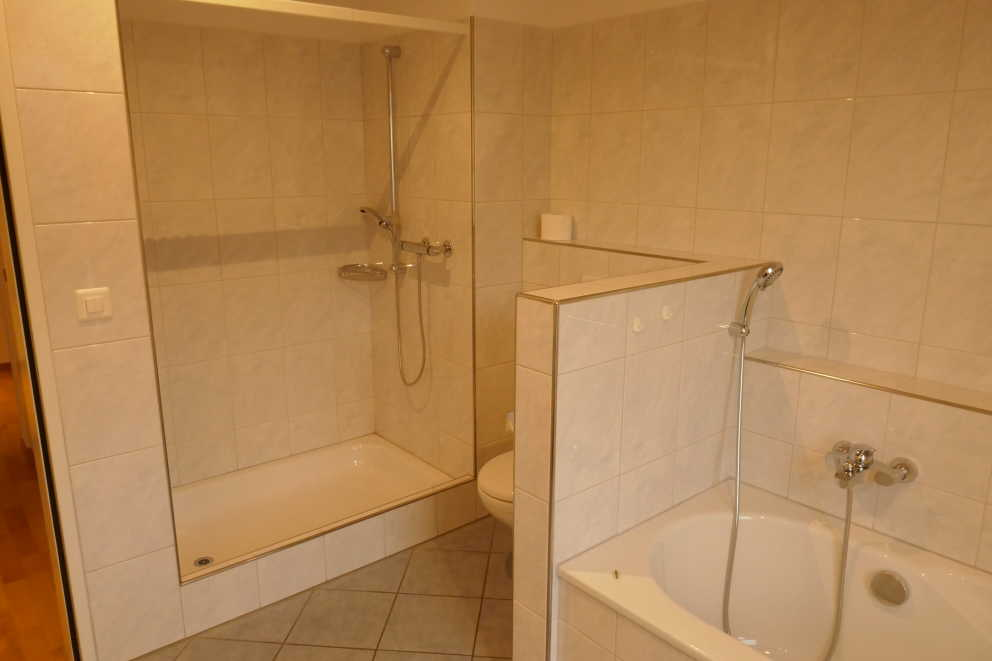

In [ ]:
for i in range(150):
    clear_output()
    dir = "/Users/acallil/Desktop/Andre/Studies/Propulsion/Project/Data/data/annotations_dated/20190706/room-type/bath/"
    r = random_file(dir)

    print(r)
    display(Image(data=dir, filename=(dir+r)))
    variable = int(input())


    bath.append(variable)
    imag.append(r)
    

In [ ]:
base = "/Users/acallil/Desktop/Andre/Studies/Propulsion/Project/Data/data/annotations_dated/20190706/room-type/"

for i in range(class_baths_df.shape[0]):
    current_file_path = os.path.join(base, 'bath', class_baths_df['image_uri'][i])
    if os.path.isfile(current_file_path):
        if class_baths_df['class'][i] == 1:
            shutil.move(current_file_path,
            os.path.join(base, 'classification', 'bath', 'top-bath', 'new', class_baths_df['image_uri'][i]))
        if class_baths_df['class'][i] == 3:
            shutil.move(current_file_path,
            os.path.join(base, 'classification', 'bath', 'simple-bath', 'new', class_baths_df['image_uri'][i]))
        if class_baths_df['class'][i] == 4:
            shutil.move(current_file_path,
            os.path.join(base, 'classification', 'bath', 'delete', class_baths_df['image_uri'][i]))


In [ ]:
'''base = '../Data/data/annotations_dated/20190706/room-type/'

for i in range(class_baths_df.shape[0]):
    current_file_path = os.path.join(base, 'bath', class_baths_df['image_uri'][i])
    if os.path.isfile(current_file_path):
        if class_baths_df['class'][i] == 1:
            shutil.move(current_file_path,
            os.path.join(base, 'classification', 'bath', 'top-bath', class_baths_df['image_uri'][i]))
        if class_baths_df['class'][i] == 2:
            shutil.move(current_file_path,
            os.path.join(base, 'classification', 'bath', 'normal-bath', class_baths_df['image_uri'][i]))
        if class_baths_df['class'][i] == 3:
            shutil.move(current_file_path,
            os.path.join(base, 'classification', 'bath', 'simple-bath', class_baths_df['image_uri'][i]))
        if class_baths_df['class'][i] == 4:
            shutil.move(current_file_path,
            os.path.join(base, 'classification', class_baths_df['image_uri'][i]))'''

In [36]:
img = []
kit = []

In [46]:
class_kits_df = pd.DataFrame(list(zip(img, kit)), 
               columns =['image_uri', 'class']) 
class_kits_df['class'].astype(float)
class_kits_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 2 columns):
image_uri    336 non-null object
class        336 non-null int64
dtypes: int64(1), object(1)
memory usage: 5.3+ KB


In [53]:
base = "/Users/acallil/Desktop/Andre/Studies/Propulsion/Project/Data/data/annotations_dated/20190706/room-type/"

for i in range(class_kits_df.shape[0]):
    current_file_path = os.path.join(base, 'kit', class_kits_df['image_uri'][i])
    if os.path.isfile(current_file_path):
        if class_kits_df['class'][i] == 1:
            shutil.move(current_file_path,
            os.path.join(base, 'classification', 'kit', 'top-kit', 'new', class_kits_df['image_uri'][i]))
        if class_kits_df['class'][i] == 3:
            shutil.move(current_file_path,
            os.path.join(base, 'classification', 'kit', 'simple-kit', 'new', class_kits_df['image_uri'][i]))
        if class_kits_df['class'][i] == 4:
            shutil.move(current_file_path,
            os.path.join(base, 'classification', 'kit', 'delete', class_kits_df['image_uri'][i]))
            

f5cf6ad2969d4d50d5d65d86ad65dc14dda62f53.jpg


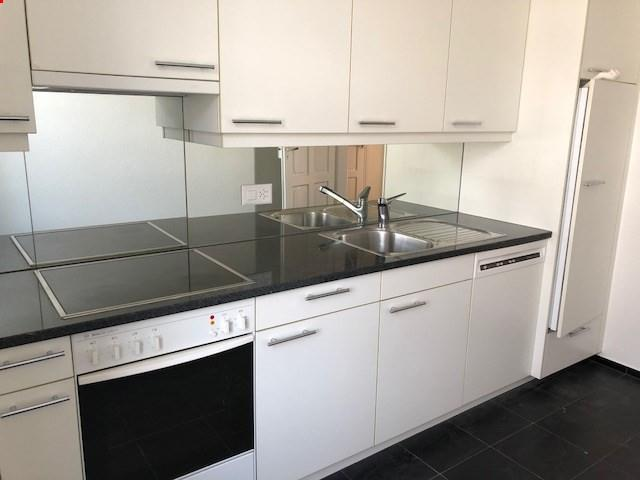

ValueError: invalid literal for int() with base 10: ''

In [52]:
for i in range(250):
    clear_output()
    dir = "/Users/acallil/Desktop/Andre/Studies/Propulsion/Project/Data/data/annotations_dated/20190706/room-type/kit/"
    r = random_file(dir)

    print(r)
    display(Image(data=dir, filename=(dir+r)))
    variable = int(input())
    kit.append(variable)
    img.append(r)
    